In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [9]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [86]:
# adults, babies and children cant be zero at same time because it means the room is no filled, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [12]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# EDA

In [13]:
#Melihat dari negara mana kebanyakan pemesan membatalkan pesanan hotel
country_cancel = df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
country_cancel.columns = ['country', 'No of guests']
country_cancel

,country,No of guests
0,PRT,27506
1,GBR,2452
2,ESP,2177
3,FRA,1933
4,ITA,1333
...,...,...
122,UMI,1
123,HND,1
124,FJI,1
125,SYC,1


In [14]:
basemap = folium.Map()
guests_map = px.choropleth(country_cancel, locations = country_cancel['country'],
                           color = country_cancel['No of guests'], hover_name = country_cancel['country'])
guests_map.show()

People from all over the world who is canceling most guests are from Portugal and other countries in Europe

**How much do guests pay for a room per night?**

<Axes: xlabel='adr', ylabel='Count'>

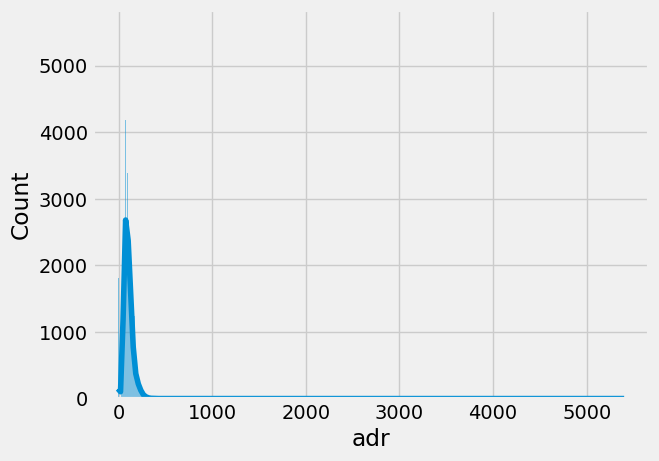

In [15]:
sns.histplot(df['adr'],kde=True)

<Axes: xlabel='reserved_room_type', ylabel='adr'>

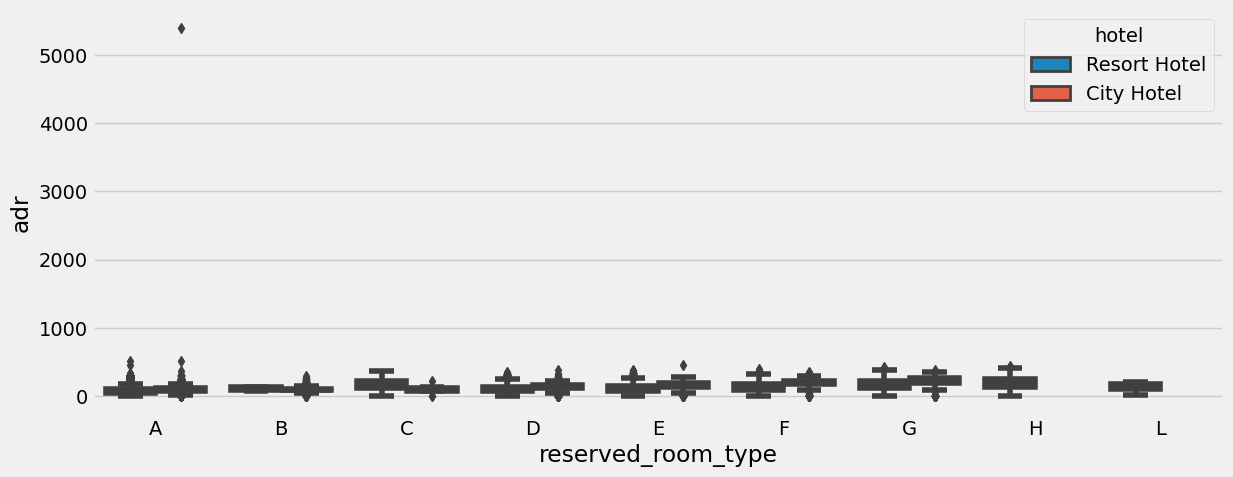

In [16]:
plt.figure(figsize=(13,5))
order_room = ['A','B','C','D','E','F','G','H','L']
sns.boxplot(data = df, x = 'reserved_room_type', y = 'adr', order=order_room,hue='hotel')

Delet Outlier pada adr tertinggi

In [17]:
df['adr'].max()

5400.0

In [18]:
df[(df['reserved_room_type'] == 'A') & (df['adr'] == df['adr'].max())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [19]:
df = df.drop(df[(df['reserved_room_type'] == 'A') & (df['adr'] == df['adr'].max())].index)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<Axes: xlabel='reserved_room_type', ylabel='adr'>

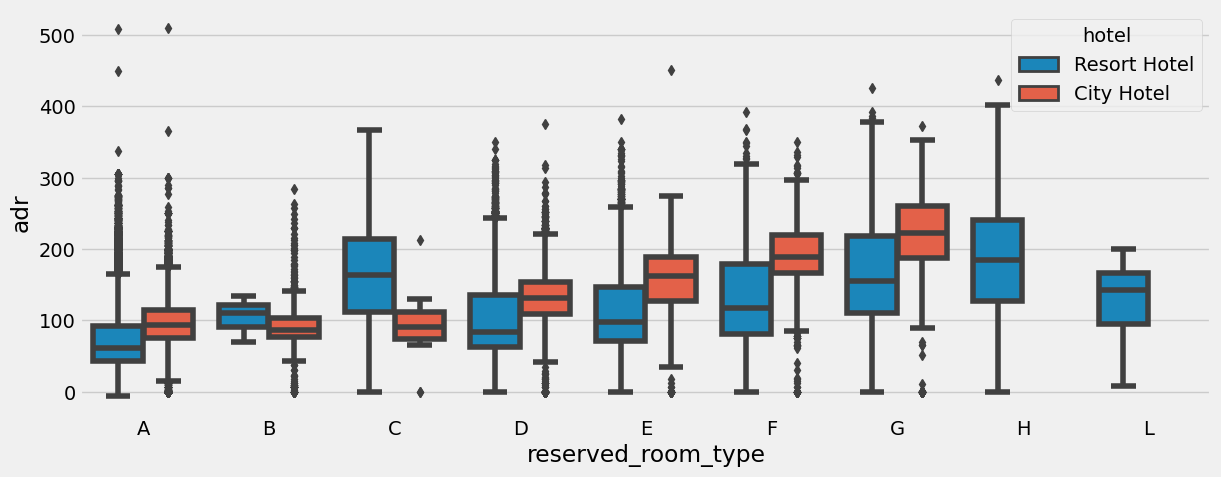

In [20]:
plt.figure(figsize=(13,5))
order_room = ['A','B','C','D','E','F','G','H','L']
sns.boxplot(data = df, x = 'reserved_room_type', y = 'adr', order=order_room,hue='hotel')

In [21]:
medians = df.groupby(['hotel', 'reserved_room_type'])['adr'].median()
price_room = pd.DataFrame(medians).reset_index()
price_room


,hotel,reserved_room_type,adr
0,City Hotel,A,94.000
1,City Hotel,B,87.000
2,City Hotel,C,90.000
3,City Hotel,D,132.000
4,City Hotel,E,162.000
5,City Hotel,F,189.365
6,City Hotel,G,222.150
7,Resort Hotel,A,60.700
8,Resort Hotel,B,110.000
9,Resort Hotel,C,163.415


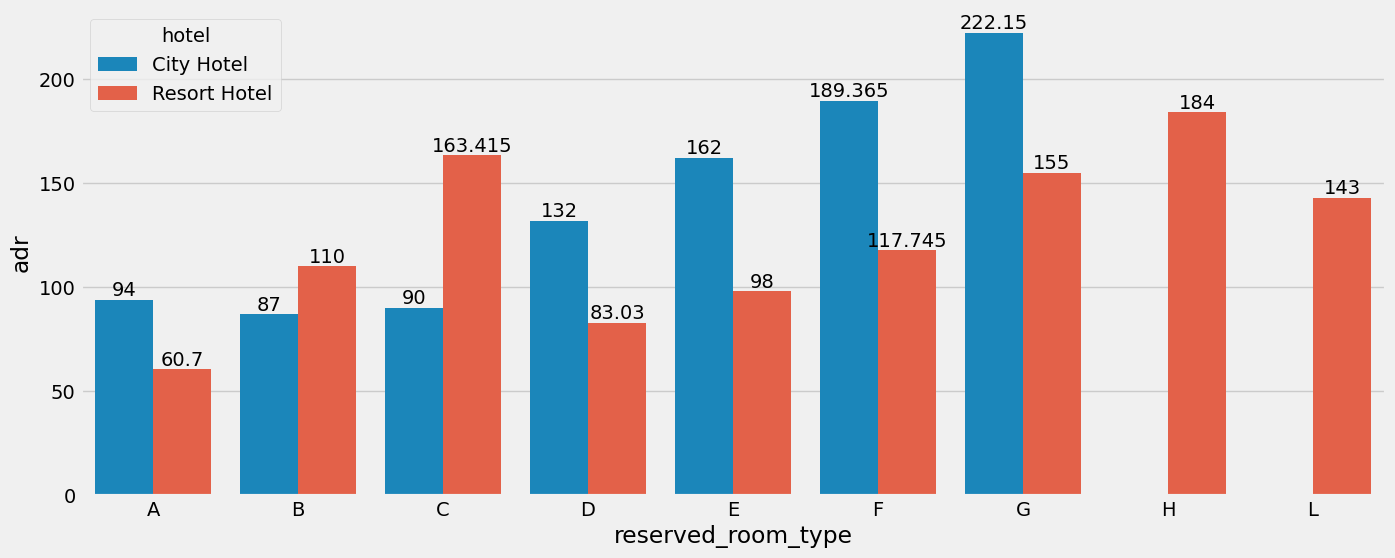

In [22]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data = price_room, x='reserved_room_type',y='adr',hue='hotel')
for i in ax.containers:
    ax.bar_label(i,)

Didapatkan harga kamar yang ber-variatif dari city hotel dan dari resort hotel. Dimana harga termahal yaitu berada pada tipe kamar E, F, dan G.

In [23]:
data_resort = df[(df['hotel'] == 'Resort Hotel')]
data_city = df[(df['hotel'] == 'City Hotel')]

**Jumlah Status Reservasi**

In [54]:
data_reservasi = df['reservation_status'].value_counts().reset_index()
data_reservasi

,reservation_status,count
0,Check-Out,75011
1,Canceled,42992
2,No-Show,1206


AttributeError: 'Wedge' object has no attribute 'get_percentage'

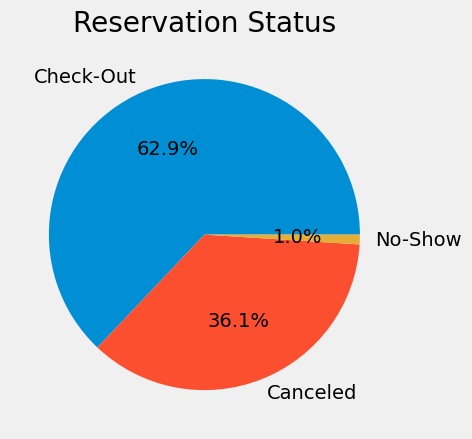

In [61]:

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(data_reservasi['count'], labels=data_reservasi['reservation_status'], autopct='%1.1f%%')
ax.set_title('Reservation Status')

# Add labels to each slice
for i, p in enumerate(ax.patches):
    percentage = f'{p.get_percentage():.1f}%'
    x = p.center[0]
    y = p.center[1]
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Show the plot
plt.show()


Dapat dilihat dimana customer yang membatalkan pemesanan ataupun tidak jadi datang ke penginapan yaitu sebesar gambar diatas.

In [65]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [67]:
df_cancel = df[df['is_canceled']==1]
df_cancel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29


**Jumlah Pembatalan Tiap Tahun**

In [71]:
data_cancel_tahunan = df_cancel['arrival_date_year'].value_counts().reset_index().rename(columns={'arrival_date_year':'year'})
data_cancel_tahunan

,year,count
0,2016,20323
1,2017,15734
2,2015,8141


<Axes: xlabel='year', ylabel='count'>

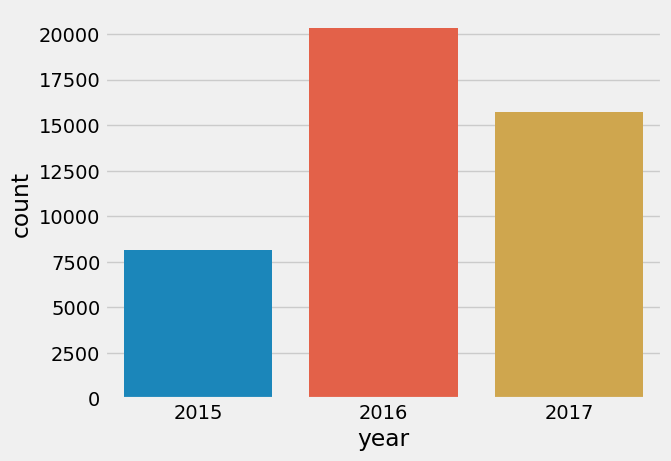

In [77]:
sns.barplot(data = data_cancel_tahunan, x='year',y='count')

Dapat diekatahui dimana pembatalan penginapan terbanyak yaitu terjadi di tahun 2016.

**Mengetahui Tipe Kamar Paling Sering Dibatalkan**

In [80]:
data_reserve_cancel = df_cancel[['reserved_room_type','hotel']].value_counts().reset_index()
data_reserve_cancel

,reserved_room_type,hotel,count
0,A,City Hotel,27242
1,A,Resort Hotel,6382
2,D,City Hotel,4146
3,D,Resort Hotel,1955
4,E,Resort Hotel,1409
5,F,City Hotel,700
6,G,Resort Hotel,644
7,E,City Hotel,499
8,B,City Hotel,367
9,C,Resort Hotel,303


<Axes: xlabel='reserved_room_type', ylabel='count'>

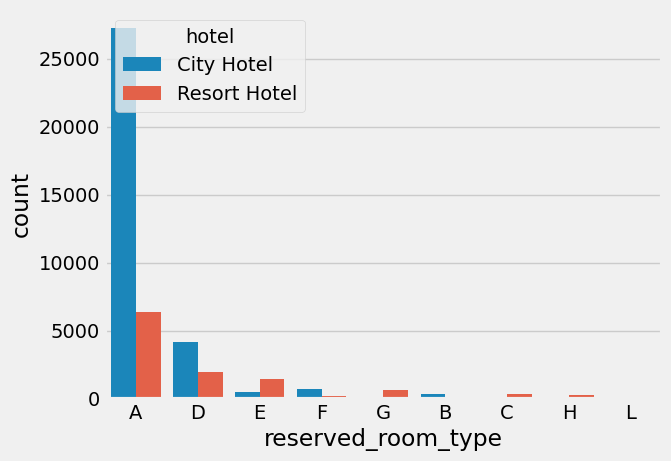

In [83]:
sns.barplot(data = data_reserve_cancel, x='reserved_room_type',y='count', hue='hotel')

Dapat dilihat bahwa pembatalan paling banyak dilakuan untuk hotel City Hotel aitu  tiper kamar A, D, dan F, sedangkan untuk hotel Resport hotel yaitu dengan tipe A, D, dan E.

**Mengatahui Jumlah Pembatalan berdasarkan Tipe Depositnya**

In [84]:
data_deposit_cancel = df_cancel['deposit_type'].value_counts().reset_index()
data_deposit_cancel

,deposit_type,count
0,No Deposit,29669
1,Non Refund,14493
2,Refundable,36


<Axes: xlabel='deposit_type', ylabel='count'>

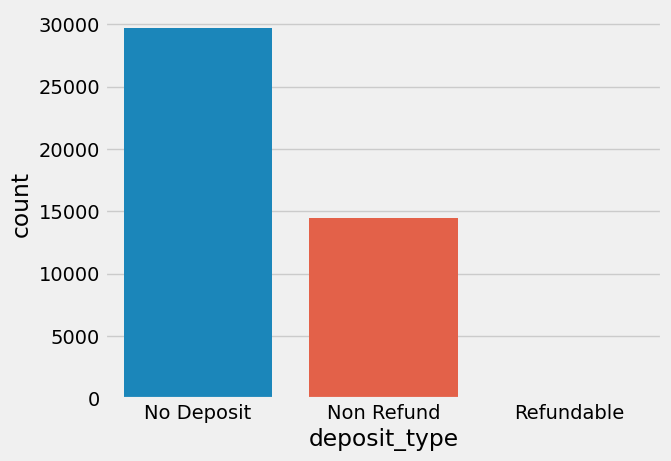

In [85]:
sns.barplot(data = data_deposit_cancel, x='deposit_type', y='count')

Dapat dilihat bahwa tipe deposit 'No Deposit' menjadi tiper deposit yang paling sering terjadi pembatalan pemesanan penginapan.

In [90]:
data_cancel_customer_type = df_cancel['customer_type'].value_counts().reset_index()
data_cancel_customer_type

,customer_type,count
0,Transient,36493
1,Transient-Party,6385
2,Contract,1262
3,Group,58


<Axes: xlabel='customer_type', ylabel='count'>

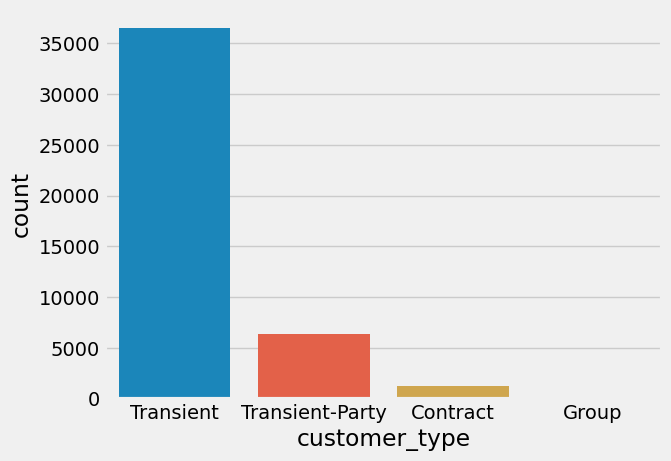

In [91]:
sns.barplot(data = data_cancel_customer_type, x='customer_type', y='count')

Dapat diliha bahwasanya pemesanan sering kali terjadi oleh tipe customer Transient.

**Which are the most busy months(all data) ?**

In [24]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,4894
1,July,4573
2,April,3609
3,May,3559
4,October,3553
5,March,3334
6,September,3108
7,February,3102
8,June,3044
9,December,2645


In [25]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,8967
1,May,8221
2,July,8071
3,June,7885
4,October,7594
5,April,7469
6,September,7392
7,March,6433
8,February,4950
9,November,4336


In [26]:
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [27]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests = final_guests.set_index('month').loc[order_month].reset_index()
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,2191,3730
1,February,3102,4950
2,March,3334,6433
3,April,3609,7469
4,May,3559,8221
5,June,3044,7885
6,July,4573,8071
7,August,4894,8967
8,September,3108,7392
9,October,3553,7594


In [29]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

Melihat Bulan Apa Customer sering melakukan Cancel

In [30]:
data_resort_cancel = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1) ]
data_city_cancel = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)]

In [32]:
resort_guests_canceled = data_resort_cancel['arrival_date_month'].value_counts().reset_index()
resort_guests_canceled.columns=['month','no of guests']
resort_guests_canceled

,month,no of guests
0,August,1637
1,July,1436
2,April,1059
3,May,1024
4,June,1007
5,September,1006
6,October,978
7,February,794
8,March,763
9,December,631


In [33]:
city_guests_canceled = data_city_cancel['arrival_date_month'].value_counts().reset_index()
city_guests_canceled.columns=['month','no of guests']
city_guests_canceled

,month,no of guests
0,May,3653
1,August,3600
2,June,3527
3,April,3459
4,July,3301
5,October,3268
6,September,3109
7,March,2384
8,February,1899
9,December,1737


In [34]:
final_guests_canceled = resort_guests_canceled.merge(city_guests,on='month')
final_guests_canceled.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests_canceled = final_guests_canceled.set_index('month').loc[order_month].reset_index()
final_guests_canceled

,month,no of guests in resort,no of guest in city hotel
0,January,325,3730
1,February,794,4950
2,March,763,6433
3,April,1059,7469
4,May,1024,8221
5,June,1007,7885
6,July,1436,8071
7,August,1637,8967
8,September,1006,7392
9,October,978,7594


In [39]:
px.line(final_guests_canceled, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests canceled per Months', template = 'plotly_dark')

Dari gambar diatas didapatkan bahwa pemesanan paling banyak yaitu berada di bulan Agustus dan May, namun pembatalan pemesanan ataupun tidak jadi datang ke penginapan terdapat di bulan Agustus. Ini dapat menjadi indikasi bahwa semakin banyak pemesanan kamar maka terindikasi semakin banyak pembatalan kamar.

**How long do people stay at the hotels? BERAPA LAMA CUSTOMER MEMESAN UNTUK MENGINAP NAMUN AKHIRNYA DIBATALKAN**

In [48]:
filter = df['is_canceled'] == 1
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,...,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,...,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23,4
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,...,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11,7
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29,10


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,13
1,0,Resort Hotel,10
2,1,City Hotel,4103
3,1,Resort Hotel,1168
4,2,City Hotel,10432
...,...,...,...
59,30,Resort Hotel,3
60,33,City Hotel,2
61,33,Resort Hotel,1
62,42,Resort Hotel,1


In [ ]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

Pembatalan untuk city hotel paling sering terjadi yaitu untuk pemesanan 2 & 3 malam, sedangkan untuk resort hotel yaitu untuk pemesanan 7 & 3 malam.

In [ ]:
df_cancel = df['is_canceled'].value_counts().reset_index()
df_cancel

,is_canceled,count
0,0,75011
1,1,44199


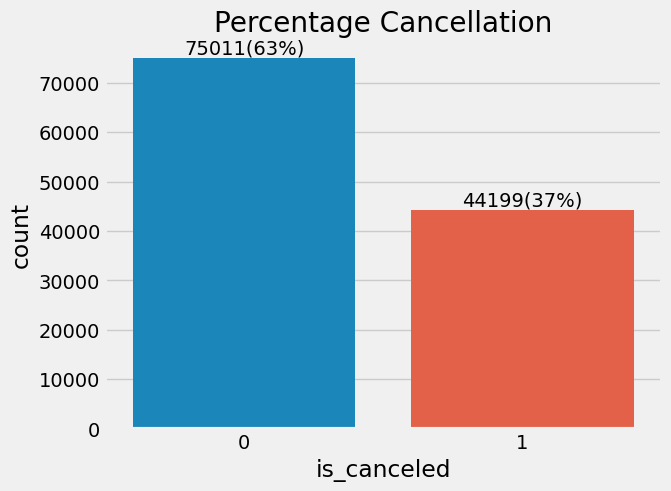

In [ ]:
ax = sns.countplot(x='is_canceled', data=df, order=df['is_canceled'].value_counts().index)
abs_values = df['is_canceled'].value_counts(ascending=False)
rel_values = df['is_canceled'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]}({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls) #puts the labels on the bars
ax.set_title('Percentage Cancellation')
plt.xticks(rotation=0)
plt.show()

# DATA PRE-PROCESSING

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# checking for null values 

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


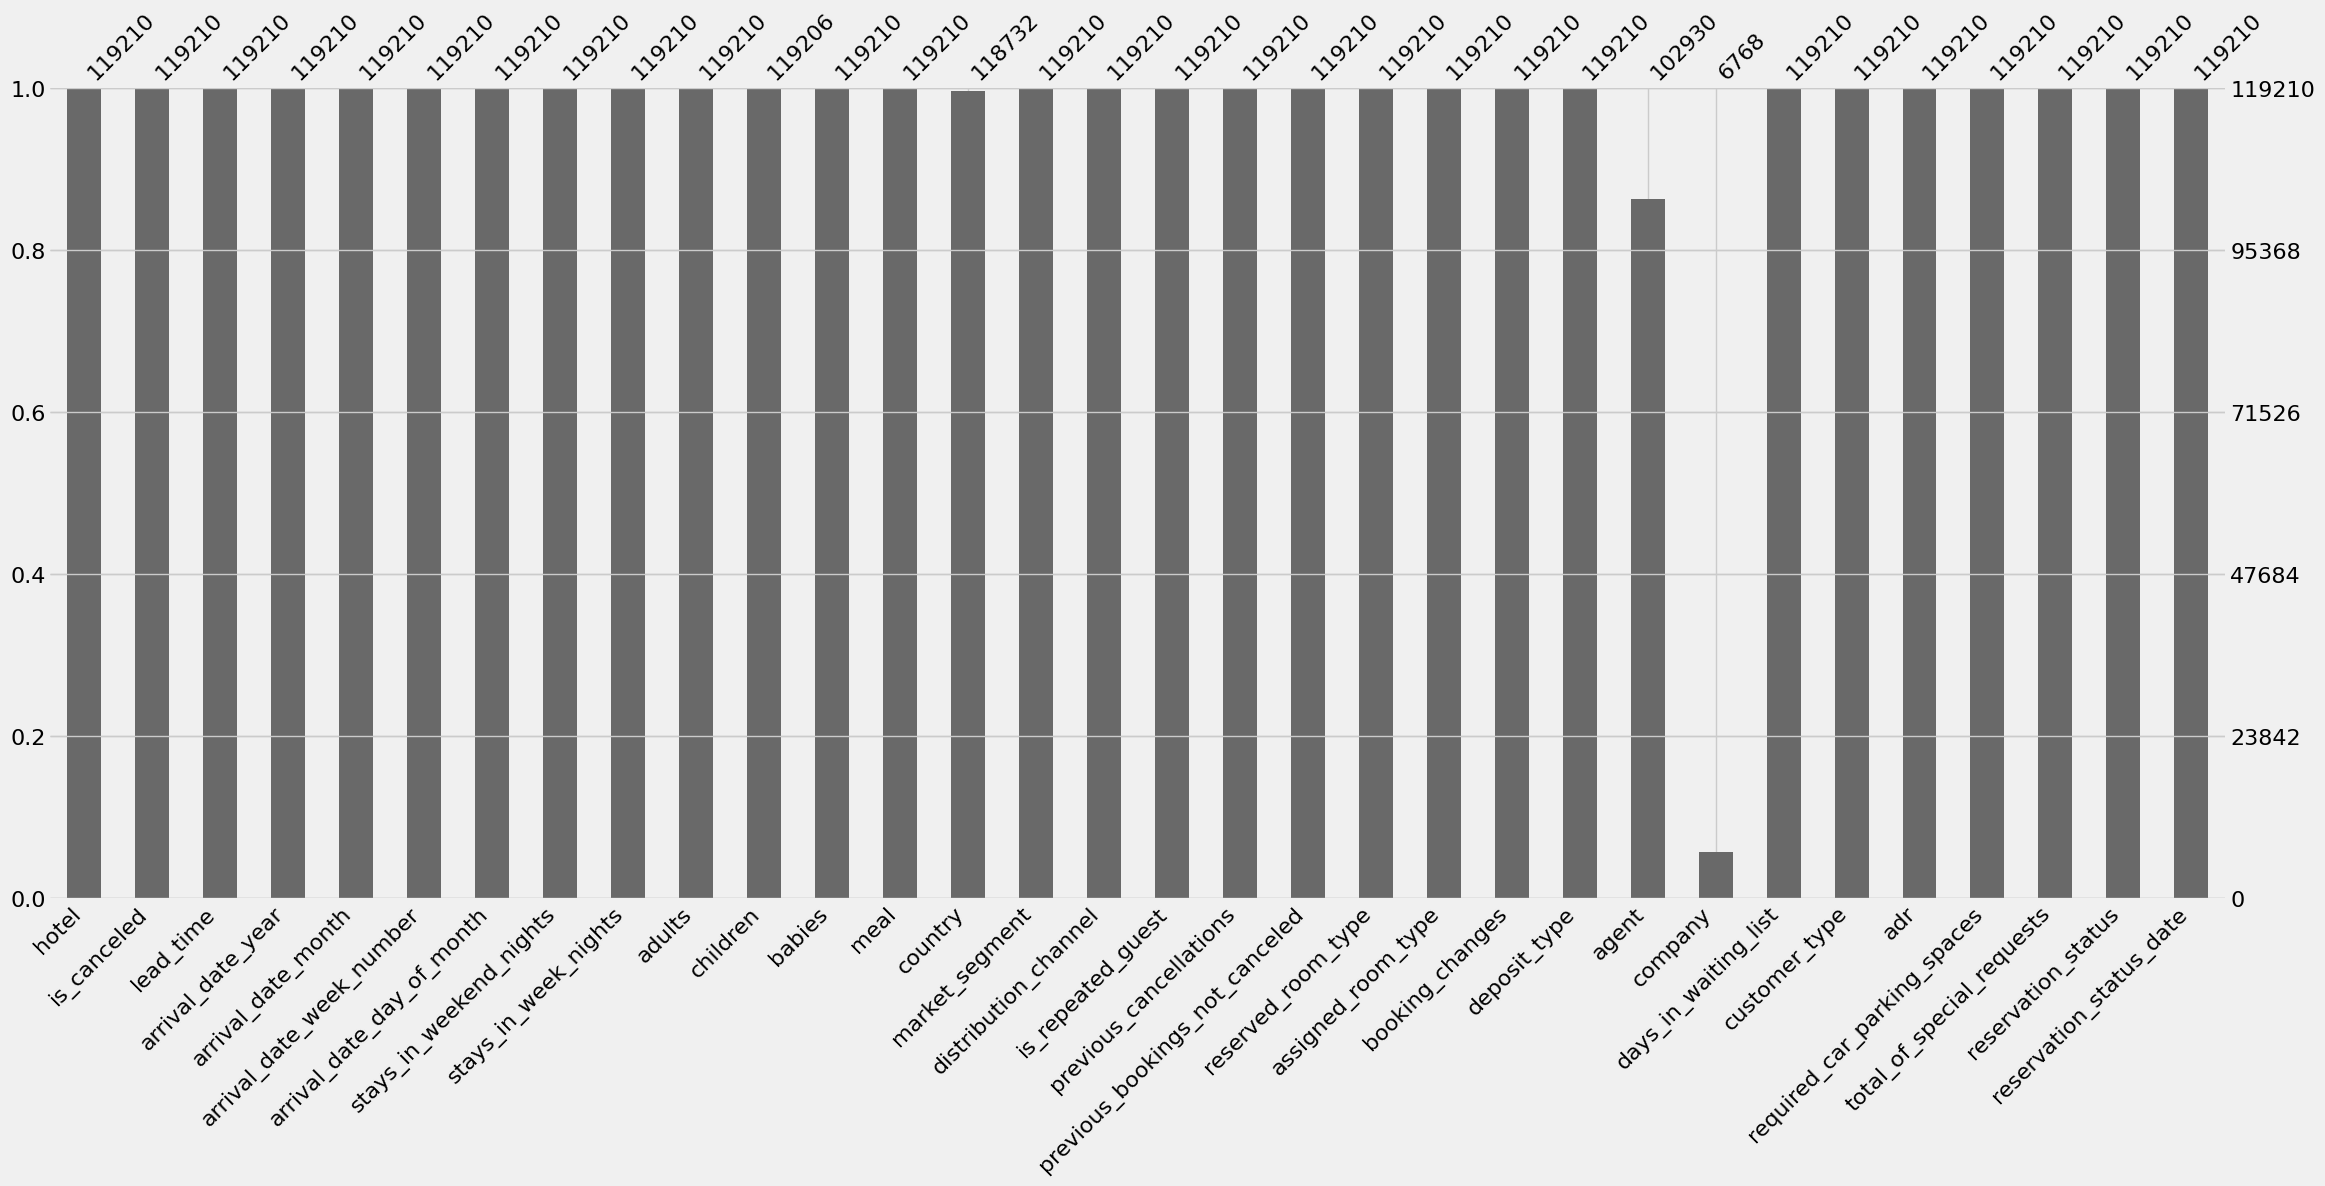

In [ ]:
# visualizing null values
msno.bar(df)
plt.show()

Diputuskan untuk menghapus kolom company dikarerkan jumlah missing value yang tinggi.

In [ ]:
check_unique = []

for col in df.columns:
    unique_values = df[col].drop_duplicates()
    sample_size = min(3, unique_values.nunique())
    check_unique.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(unique_values.sample(sample_size).values)])

df_unique = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'], data=check_unique)
df_unique


,dataFeatures,dataType,null,unique,uniqueSample
0,hotel,object,0,2,"[City Hotel, Resort Hotel]"
1,is_canceled,int64,0,2,"[0, 1]"
2,lead_time,int64,0,479,"[30, 211, 138]"
3,arrival_date_year,int64,0,3,"[2016, 2017, 2015]"
4,arrival_date_month,object,0,12,"[December, August, November]"
5,arrival_date_week_number,int64,0,53,"[49, 27, 28]"
6,arrival_date_day_of_month,int64,0,31,"[6, 25, 5]"
7,stays_in_weekend_nights,int64,0,17,"[0, 5, 14]"
8,stays_in_week_nights,int64,0,33,"[33, 11, 25]"
9,adults,int64,0,14,"[26, 6, 55]"


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
numericals = [feature for feature in data.columns if(data[feature].dtype != 'O')]
categoricals = [feature for feature in data.columns if(data[feature].dtype == 'O')]

In [ ]:
numericals

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_nights']

In [ ]:
categoricals

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
num_corr = data[numericals].corr()
num_corr

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,NaN,1.000000,-0.057540,0.170567,-0.027245,-0.043761,0.017167,0.077887,-0.079224,-0.017622,-0.018521,0.094487,-0.024558,-0.034194,-0.097906,0.154905,0.148897,-0.205017,NaN,-0.146343,-0.004700
arrival_date_year,NaN,-0.057540,1.000000,-0.537772,0.003981,0.039189,0.075676,0.018201,0.082915,-0.019790,-0.108954,-0.210168,0.004249,0.047337,0.138794,0.220808,-0.049773,0.242282,NaN,0.115074,0.072032
arrival_date_week_number,NaN,0.170567,-0.537772,1.000000,0.029393,0.004614,-0.013276,0.022160,-0.003318,0.021588,0.033575,0.072051,-0.003359,0.008518,-0.069181,0.057157,-0.008767,0.035501,NaN,0.030952,-0.008045
arrival_date_day_of_month,NaN,-0.027245,0.003981,0.029393,1.000000,-0.014032,-0.037706,0.003127,0.013764,0.000392,-0.007939,-0.042873,-0.000287,0.012970,-0.004120,0.076660,0.017544,0.035918,NaN,0.014439,-0.033695
stays_in_weekend_nights,NaN,-0.043761,0.039189,0.004614,-0.014032,1.000000,0.479446,0.047070,0.089176,0.029714,-0.045775,-0.011682,-0.013858,0.047326,0.180099,-0.029339,-0.061789,0.068448,NaN,0.098190,0.756754
stays_in_week_nights,NaN,0.017167,0.075676,-0.013276,-0.037706,0.479446,1.000000,0.038899,0.094632,0.038390,-0.043071,-0.018851,-0.024692,0.061682,0.227071,0.286236,-0.023398,0.086627,NaN,0.115370,0.936491
adults,NaN,0.077887,0.018201,0.022160,0.003127,0.047070,0.038899,1.000000,0.014460,0.005582,-0.035450,-0.003152,-0.032050,0.001662,-0.025526,0.135272,-0.016356,0.101970,NaN,0.050001,0.047786
children,NaN,-0.079224,0.082915,-0.003318,0.013764,0.089176,0.094632,0.014460,1.000000,0.025528,-0.026596,-0.037002,-0.008697,0.061789,0.089920,0.024986,-0.042622,0.332758,NaN,0.068893,0.106128
babies,NaN,-0.017622,-0.019790,0.021588,0.000392,0.029714,0.038390,0.005582,0.025528,1.000000,-0.006873,-0.007401,-0.002266,0.079025,0.039481,-0.031196,-0.010142,0.026084,NaN,0.090639,0.040471


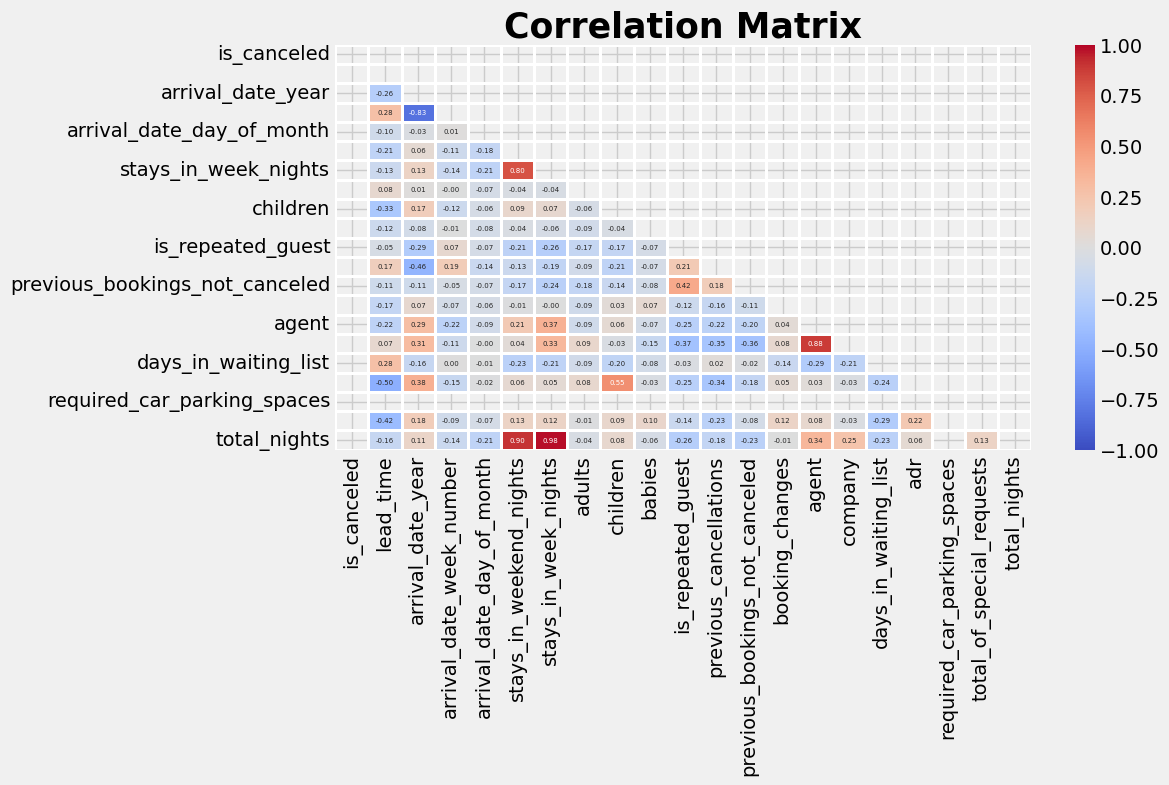

In [ ]:
# Correlation Matrix
corr_matrix = num_corr.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True,linewidths=1,fmt='.2f',cmap='coolwarm',vmin=-1, vmax=1, mask=mask, annot_kws={'size':5})
plt.title('Correlation Matrix', size=25, weight='bold')
plt.savefig('Correaltion Matrix.jpg', bbox_inches='tight')